In [1]:
# G-Condition Latitudeinal Dependence Study
import matplotlib.pyplot as plt
plt.style.use(["science", "ieee"])
import datetime as dt
import sys
sys.path.append("py/")
from fetch import *
import utils
import cartopy.crs as ccrs
import cartopy
import matplotlib.ticker as mticker
import numpy as np
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.dates as mdates

import netCDF4 as nc
center, lonx = 41, -99
lat_low, lat_up = center-7, center+7

In [2]:
def fetch_occl_data(d=dt.datetime(2017,8,21,18)):
    folder = "dataset/Mark/euv/%s_%dkm_171_1.nc"
    file = folder % (d.strftime("%Y%m%d%H%M%S"), 150)
    
    ds = nc.Dataset(file)
    of = ds.variables["of"][:]
    lat, lon = ds.variables["glat"][:], ds.variables["glon"][:]
    glat, glon = np.meshgrid(lat, lon)
    return lat, lon, glat, glon, of

lat, lon, glat, glon, of = fetch_occl_data()

In [3]:
params = [
    {
        "name": "e",
        "unit_multiplier": 1.,
        "unit": "cc",
        "mol_to_cc": "T",
        "interpolate": {"scale": "log", "type": "linear"},
    },
]

dw0 = DiffWACCMX(
        "dataset/29jan2022/ECL_1100_0100_all.nc",
        "dataset/29jan2022/BGC_1100_0100_all.nc",
        params=params,
        stn=None,
        loc={"lat": center, "lon":lonx},
    )

k = pconst["q_e"]**2/(pconst["m_e"]*pconst["eps0"])
e_eclipse0 = dw0.eclipse.dataset[0]["interpol_value"]["value"]
ttime0 = dw0.eclipse.dataset[0]["interpol_value"]["time"]
f0_240, f0_150 = (
    np.sqrt(e_eclipse0[:, np.argmin(np.abs(dw0.eclipse.intp_height-240))]*1e6*k)/(2*np.pi), 
    np.sqrt(e_eclipse0[:, np.argmin(np.abs(dw0.eclipse.intp_height-150))]*1e6*k)/(2*np.pi)
)

2022-08-29 22:16:54.095 | INFO     | fetch:__init__:230 - Run extraction for dataset/29jan2022/ECL_1100_0100_all.nc
2022-08-29 22:16:54.096 | INFO     | fetch:load_file:265 - Load dataset/29jan2022/ECL_1100_0100_all.nc
2022-08-29 22:16:54.334 | INFO     | fetch:extract_dimension:273 - Run extraction dimension: dataset/29jan2022/ECL_1100_0100_all.nc
2022-08-29 22:17:02.964 | INFO     | fetch:run_extractions:292 - Load dataset/29jan2022/ECL_1100_0100_all.nc, e
2022-08-29 22:17:16.968 | INFO     | fetch:transform_density:251 - Transform density scale/unit dataset/29jan2022/ECL_1100_0100_all.nc
2022-08-29 22:17:18.310 | INFO     | fetch:__init__:230 - Run extraction for dataset/29jan2022/BGC_1100_0100_all.nc
2022-08-29 22:17:18.310 | INFO     | fetch:load_file:265 - Load dataset/29jan2022/BGC_1100_0100_all.nc
2022-08-29 22:17:18.419 | INFO     | fetch:extract_dimension:273 - Run extraction dimension: dataset/29jan2022/BGC_1100_0100_all.nc
2022-08-29 22:17:26.223 | INFO     | fetch:run_extr

In [4]:
dw1 = DiffWACCMX(
        "dataset/29jan2022/ECL_1100_0100_all.nc",
        "dataset/29jan2022/BGC_1100_0100_all.nc",
        params=params,
        stn=None,
        loc={"lat": lat_low, "lon":lonx},
    )

k = pconst["q_e"]**2/(pconst["m_e"]*pconst["eps0"])
e_eclipse1 = dw1.eclipse.dataset[0]["interpol_value"]["value"]
ttime1 = dw1.eclipse.dataset[0]["interpol_value"]["time"]
f1_240, f1_150 = (
    np.sqrt(e_eclipse1[:, np.argmin(np.abs(dw1.eclipse.intp_height-240))]*1e6*k)/(2*np.pi), 
    np.sqrt(e_eclipse1[:, np.argmin(np.abs(dw1.eclipse.intp_height-150))]*1e6*k)/(2*np.pi)
)

2022-08-29 22:17:48.115 | INFO     | fetch:__init__:230 - Run extraction for dataset/29jan2022/ECL_1100_0100_all.nc
2022-08-29 22:17:48.115 | INFO     | fetch:load_file:265 - Load dataset/29jan2022/ECL_1100_0100_all.nc
2022-08-29 22:17:48.119 | INFO     | fetch:extract_dimension:273 - Run extraction dimension: dataset/29jan2022/ECL_1100_0100_all.nc
2022-08-29 22:17:51.667 | INFO     | fetch:run_extractions:292 - Load dataset/29jan2022/ECL_1100_0100_all.nc, e
2022-08-29 22:17:53.175 | INFO     | fetch:transform_density:251 - Transform density scale/unit dataset/29jan2022/ECL_1100_0100_all.nc
2022-08-29 22:17:55.959 | INFO     | fetch:__init__:230 - Run extraction for dataset/29jan2022/BGC_1100_0100_all.nc
2022-08-29 22:17:55.959 | INFO     | fetch:load_file:265 - Load dataset/29jan2022/BGC_1100_0100_all.nc
2022-08-29 22:17:55.963 | INFO     | fetch:extract_dimension:273 - Run extraction dimension: dataset/29jan2022/BGC_1100_0100_all.nc
2022-08-29 22:17:59.540 | INFO     | fetch:run_extr

In [5]:
dw2 = DiffWACCMX(
        "dataset/29jan2022/ECL_1100_0100_all.nc",
        "dataset/29jan2022/BGC_1100_0100_all.nc",
        params=params,
        stn=None,
        loc={"lat": lat_up, "lon":lonx},
    )

k = pconst["q_e"]**2/(pconst["m_e"]*pconst["eps0"])
e_eclipse2 = dw2.eclipse.dataset[0]["interpol_value"]["value"]
ttime2 = dw2.eclipse.dataset[0]["interpol_value"]["time"]
f2_240, f2_150 = (
    np.sqrt(e_eclipse2[:, np.argmin(np.abs(dw2.eclipse.intp_height-240))]*1e6*k)/(2*np.pi), 
    np.sqrt(e_eclipse2[:, np.argmin(np.abs(dw2.eclipse.intp_height-150))]*1e6*k)/(2*np.pi)
)

2022-08-29 22:18:39.312 | INFO     | fetch:__init__:230 - Run extraction for dataset/29jan2022/ECL_1100_0100_all.nc
2022-08-29 22:18:39.314 | INFO     | fetch:load_file:265 - Load dataset/29jan2022/ECL_1100_0100_all.nc
2022-08-29 22:18:39.664 | INFO     | fetch:extract_dimension:273 - Run extraction dimension: dataset/29jan2022/ECL_1100_0100_all.nc
2022-08-29 22:19:07.910 | INFO     | fetch:run_extractions:292 - Load dataset/29jan2022/ECL_1100_0100_all.nc, e
2022-08-29 22:19:29.960 | INFO     | fetch:transform_density:251 - Transform density scale/unit dataset/29jan2022/ECL_1100_0100_all.nc
2022-08-29 22:19:50.495 | INFO     | fetch:__init__:230 - Run extraction for dataset/29jan2022/BGC_1100_0100_all.nc
2022-08-29 22:19:50.496 | INFO     | fetch:load_file:265 - Load dataset/29jan2022/BGC_1100_0100_all.nc
2022-08-29 22:19:50.514 | INFO     | fetch:extract_dimension:273 - Run extraction dimension: dataset/29jan2022/BGC_1100_0100_all.nc
2022-08-29 22:20:20.198 | INFO     | fetch:run_extr

/home/shibaji/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/shibaji/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/shibaji/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'edgecolor', 'facecolor', 'linewidth'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


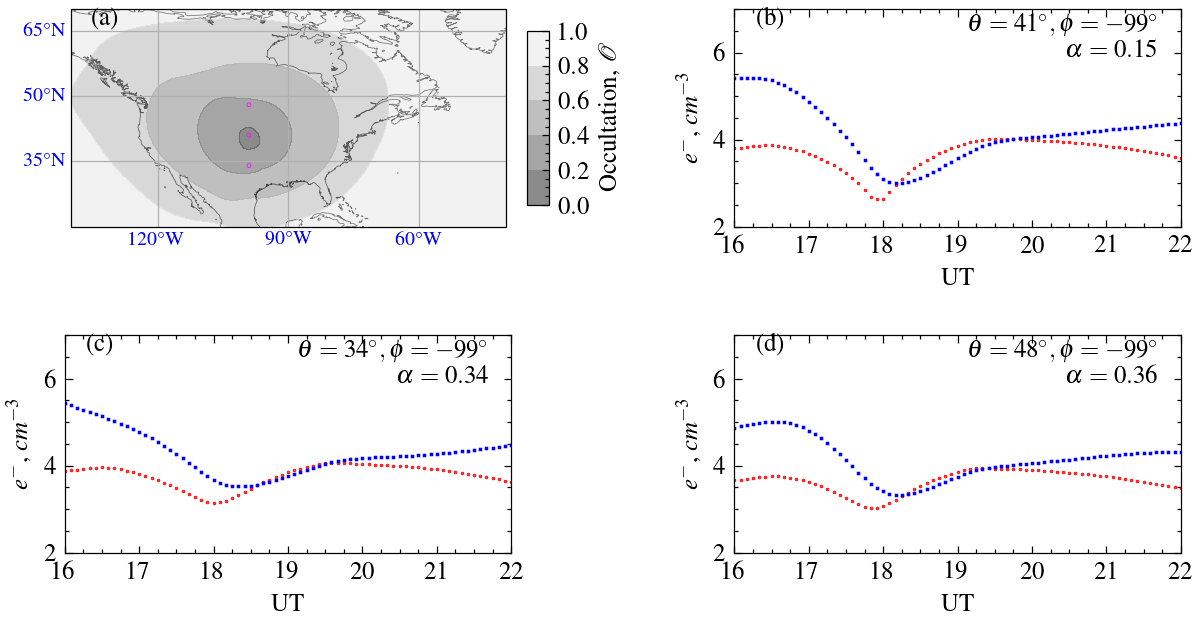

In [6]:
%matplotlib inline
fig = plt.figure(figsize=(8, 4), dpi=180)
ax = fig.add_subplot(
            221,
            projection=ccrs.PlateCarree()
        )
kwargs = {}
kwargs["edgecolor"] = "k"
kwargs["facecolor"] = "none"
kwargs["linewidth"] = 0.3
feature = cartopy.feature.NaturalEarthFeature(
            "physical", "coastline", "50m", **kwargs
        )
ax.add_feature(feature, **kwargs)
ax.set_extent([-140, -40, 20, 70], crs=ccrs.PlateCarree())
plt_lons = np.arange(-180, 181, 30)
mark_lons = np.arange(-180, 180, 30)
plt_lats = np.arange(20, 90, 15)
gl = ax.gridlines(ccrs.PlateCarree(), linewidth=0.5, draw_labels=True,)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(plt_lons)
gl.ylocator = mticker.FixedLocator(plt_lats)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.n_steps = 90
gl.ylabel_style = {'size':8, 'color': 'b'}
gl.xlabel_style = {"size":8, 'color': 'b',}

XYZ = ccrs.PlateCarree().transform_points(ccrs.Geodetic(), glon, glat)
X, Y = XYZ[:, :, 0], XYZ[:, :, 1]

im = ax.contourf(
    X, Y, of.T, transform=ccrs.PlateCarree(), cmap="gray", alpha=0.5,
    levels=[0,.2,.4,.6,.8,1.],
    vmin=0, vmax=1, **kwargs
)
cax = ax.inset_axes([1.05, 0.1, 0.05, 0.8], transform=ax.transAxes)
cb = fig.colorbar(im, ax=ax, cax=cax)
cb.set_label(r"Occultation, $\mathcal{O}$")
ax.text(0.05, 0.95, "(a)", transform=ax.transAxes, ha="left", va="center")

XYZ = ccrs.PlateCarree().transform_points(ccrs.Geodetic(), 
                                          np.array([[lonx, lonx, lonx]]), 
                                          np.array([[center, lat_low, lat_up]]))
X, Y = XYZ[:, :, 0], XYZ[:, :, 1]
ax.scatter(X, Y, s=10, color="magenta", marker=".", fc="None", lw=0.3)

ax = fig.add_subplot(222)
ax.text(0.05, 0.95, "(b)", transform=ax.transAxes, ha="left", va="center")
ax.xaxis.set_major_formatter(mdates.DateFormatter(r"%H"))
ax.set_xlabel("UT")
ax.set_ylabel(
    r"$e^-$, $cm^{-3}$"
)
a = of[np.argmin(np.abs(lat-center)), np.argmin(np.abs(lon-lonx))]
ax.text(0.95, 0.98, r"$\theta=%d^{\circ},\phi=%d^{\circ}$"%(center,lonx)+"\n"+r"$\alpha=%.2f$"%a, 
        transform=ax.transAxes, ha="right", va="top")
ax.plot(ttime0, f0_150/1e6, "ro", ms=0.4, ls="None")
ax.plot(ttime0, f0_240/1e6, "bs", ms=0.4, ls="None")
ax.set_ylim(2,7)
ax.set_xlim(dt.datetime(2017,8,21,16),dt.datetime(2017,8,21,22))

ax = fig.add_subplot(223)
fig.subplots_adjust(wspace=0.5)
ax.text(0.05, 0.95, "(c)", transform=ax.transAxes, ha="left", va="center")
ax.xaxis.set_major_formatter(mdates.DateFormatter(r"%H"))
ax.set_xlabel("UT")
ax.set_ylabel(
    r"$e^-$, $cm^{-3}$"
)
ax.plot(ttime1, f1_150/1e6, "ro", ms=0.4, ls="None")
ax.plot(ttime1, f1_240/1e6, "bs", ms=0.4, ls="None")
ax.set_ylim(2,7)
a = of[np.argmin(np.abs(lat-lat_low)), np.argmin(np.abs(lon-lonx))]
ax.set_xlim(dt.datetime(2017,8,21,16),dt.datetime(2017,8,21,22))
ax.text(0.95, 0.98, r"$\theta=%d^{\circ},\phi=%d^{\circ}$"%(lat_low,lonx)+"\n"+r"$\alpha=%.2f$"%a, 
        transform=ax.transAxes, ha="right", va="top")

ax = fig.add_subplot(224)
fig.subplots_adjust(wspace=0.5)
ax.text(0.05, 0.95, "(d)", transform=ax.transAxes, ha="left", va="center")
ax.xaxis.set_major_formatter(mdates.DateFormatter(r"%H"))
ax.set_xlabel("UT")
ax.set_ylabel(
    r"$e^-$, $cm^{-3}$"
)
a = of[np.argmin(np.abs(lat-lat_up)), np.argmin(np.abs(lon-lonx))]
ax.plot(ttime2, f2_150/1e6, "ro", ms=0.4, ls="None")
ax.plot(ttime2, f2_240/1e6, "bs", ms=0.4, ls="None")
ax.set_ylim(2,7)
ax.set_xlim(dt.datetime(2017,8,21,16),dt.datetime(2017,8,21,22))
ax.text(0.95, 0.98, r"$\theta=%d^{\circ},\phi=%d^{\circ}$"%(lat_up,lonx)+"\n"+r"$\alpha=%.2f$"%a, 
        transform=ax.transAxes, ha="right", va="top")

fig.subplots_adjust(wspace=0.5, hspace=0.5)